# NBA Playoffs

This project uses data from `basketball-reference.com` to ask questions about NBA players, who makes it to the playoffs, and how they perform once they get there. Generally, a few questions to consider looking into are:

* Which people over/under-perform in the playoffs (compared to the regular season).
* Who makes it to the playoffs? Teams with better performing Centers? Forwards Guards? Younger teams?

### Getting the data

* The yearly data on all players for the regular season year `20XX` is found at the url:
```
https://www.basketball-reference.com/leagues/NBA_20XX_totals.html
```
* The yearly playoff data on all players in the playoffs for the year `20XX` is found at the url:
```
https://www.basketball-reference.com/playoffs/NBA_20XX_totals.html
```

Use `pd.read_html` to get data from 2012-2018, combine it into a single (cleaned) dataframe, and save it to a local file (so you are not repeatedly requesting data from the url). Be sure to keep track of which year each row came from!

### Combining playoff and regular season data; cleaning the data; doing descriptive statistics

* For each year, join the regular season data and playoff data for each player. This is tricky, as players are sometimes traded mid-season and will occupy more than one row in a given year.
* Clean the data, create useful new columns, and handle null values appropriately.
* Assess the data through univariate and bivariate analysis. Consider attributions to aggregrate by as well; analyze the aggregates.

### Missingness

Since each dataset (regular season and playoffs) separately has no "unpredictable" missing values, missingness will solely reflect whether a player was present in the playoffs or not. Consider the missingness in a column from the playoffs table and assess its missingness dependent on columns in the regular-season table.

### Hypothesis Test

Find a hypothesis test to perform. You can use the questions at the top of the notebook for inspiration.


---
# Summary of Findings


## Introduction
---
What interests me most about this dataset is how basketball as a sport might be changing over the years.  That is to say, how do team dynamics change across years, and how does this differ when teams enter into the post season?  Specifically, I was interested to see how points scored are distributed across a team.  One strategy that a team might employ would be to have one central star who scores a large portion of the team's points.  Another strategy would be to have a more balanced team composition and to have the team's points be spread more equally across the team.





### Results of Cleaning and EDA:
---
When cleaning the dataset, I didn't really have to do much.  Most values of the dataset were originally strings, so I needed to simply go through and convert all columns containing numerical values to be floats.  Then, due to how I combined the datasets, there exist many null values for years when players did not play in the league.  To avaoid these values, I looked at individual seasons and removed all rows for players which have no data for the year (because they did not play in the NBA).

As a measure of how well points are spread across a team, I chose to look at the variance of points scored per minute of playtime across each team.  But why points per minute, and why variance? That latter is easiest explained, as a team whose players share the points more equally will have a smaller variance in points scored. Alternatively, a team with high variance is more likely to have an unequal distribution in points betweenn players (i.e. a couple of players are doing the majority of a team's scoring).  I looked at points scored per minute of playtime as this has a one main advantage over simply the numbber of poinnts scored. If a player gets injured or transfered during a season, or if they simply do not get much playing time, naturally they will not have scored more points for the team than other members.  In looking at points scored per minute we therefore look at how a team utilizes their players when on the court.  If a team has one star point scorer he will likely have a higher value for points scored per minute than the rest of his team.  This can still be seen if a player is ijured or traded, as what matters is how the team interacted while that player was on the court for the team.
    
Looking at the average standard deviation of points scored per minute across each team, I saw an general increase in variance as years progressed. For the regular season, the average variance raised from 0.015129 to 0.034344, strictly looking at the change from 2012 to 2018. For the playoffs, we see a similar change, this time growing from 2012's 0.026232 to 2018's 0.048238. 


### Results of Missingness:
---

If a player is missing in the playoffs (i.e. not playing), he is most likely on a team which did not make the cutoff to be in the playoffs. Therefore, before I ran any tests I predicted that a player's missingness in the playoffs is MAR dependent on the team that he plays for. I ran out of time and could not complete the testing, but this is likely not a good choice for statistic, as I do not believe a KS test can work with distributions of string values.  A column that I do not think should influence one's chances of being in the playoffs is free throw percentage.  This is because most professional players should have a fairly high percentage, and further this is an aspect of ones game wich does not come up too often in a game.  A better choice for a statistic which influences one's chance of appearance in the playoffs is playing time.  Players who did not play much in the regular season will likely not see playing time in the post season, as they are not good enough to keep up with the rest of the competition.


### Results of Hypothesis Test
---
The results of my initial data exploration would lead me to believe that teams have begun to shift playstyles in order to prioritize a single (or few) key player(s).  The natural question to ask then is whether or not doing this positively benefits a team's scoring ability.  Does having a greater variance in points scored per minute result in a greater number of total points for the team? To simplify things, I only looked at a single year (an arbitrary choice of 2015). This enables me to not have to deal with the same player playing on multiple teams at the same time (apart from mid-season transfers), as this would not make any sense as something that could physically happen.

---
Null Hypothesis: Teams who have a greater variance in points per minute score roughly the same ammount of points as teams with a lower variance.

Alternative Hypothesis: Teams with a greater variance in points per minute score higher than the teams with a lower variance.

Test Statistic: KS statistic between the distribution of a team's scoring and their variance of points per minute.

Significance Level: 0.05

pvalue = 0.824

---
Okay, so what happened here? First, there exists the highly likely possibility that points scored is not strongly correlated to variance in points scored per minute of playtime. However, I think another factor may have contributed to this pvalue.  The KS test works best when one has many points of data. When generating its statistic, the test only had 30 data points for both the total number of points scored by a team and the variance of a team's points per minute played.

---

# Your Code Starts Here

In [3]:
%matplotlib inline
import os

import pandas as pd
import numpy as np
from scipy.stats import ks_2samp

import matplotlib.pyplot as plot
import seaborn as sns

### Cleaning and EDA:
---

In [4]:
#loading in the tables
df = pd.DataFrame(pd.read_html("https://www.basketball-reference.com/leagues/NBA_2012_totals.html")\
                  [0]).drop(['Rk'], axis=1)
df.columns = [df.columns[0]] + [str(x) + '_2012_rs' for x in df.columns[1:]]

po = pd.DataFrame(pd.read_html("https://www.basketball-reference.com/playoffs/NBA_2012_totals.html")\
                  [0]).drop(['Rk'], axis=1)
po.columns = [po.columns[0]] + [str(x) + '_2012_po' for x in po.columns[1:]]


df = pd.concat([df,po])
for i in range(2013, 2019):
    rs = pd.DataFrame(pd.read_html("https://www.basketball-reference.com/leagues/NBA_" + str(i) +\
                                   "_totals.html")[0]).drop(['Rk'], axis = 1)
    rs.columns = [rs.columns[0]] + [str(x) + '_' + str(i) + '_rs' for x in rs.columns[1:]]
    df = pd.concat([df,rs])
    
    po = pd.DataFrame(pd.read_html("https://www.basketball-reference.com/playoffs/NBA_" + str(i) + \
                                   "_totals.html")[0]).drop(['Rk'], axis = 1)
    po.columns = [po.columns[0]] + [str(x) + '_' + str(i) + '_po' for x in po.columns[1:]]
    df = pd.concat([df,po])

#dropping unnecessary rows and converting columns to correct types
df = df[df['Player'] != 'Player']
df = df.set_index('Player')
for col in df.columns:
    string = ('Pos' in col) | ('Tm' in col)
    if (not string):
        df[col] = df[col].astype(float)     

/Users/nateroberts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()
/Users/nateroberts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()
/Users/nateroberts/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept t

In [36]:
#returns a dataframe for a given year and whether or not it is the playoffs or regular season
def spec_time(df, year, season='both'):
    df = df.filter(like=str(year))
    if (season == 'both'):
        df = df[~df['Tm_' + str(year) + '_rs'].isnull()]
        return df
    
    df = df.filter(like = str(season))
    
    len_suff = len('_20XX_xx')
    df.columns = [x[:-len_suff] for x in df.columns]
    
    #only looking at players who were on a team (i.e. playing) that year
    df = df[~df['Tm'].isnull()]
    return df

def conv_to_sd(ser):
    mn = np.mean(ser)
    return (ser - mn) / np.std(ser)

#calculates the variance of points per minute for a dataframe
def calc_ppm_var(yr):
    square = 2
    var = lambda x: np.std(x) ** square
    yr['PPM'] = yr['PTS'] / yr['MP']
    piv = yr.pivot_table(index='Tm', values='PPM', aggfunc=np.std)
    
    #if a player played on multiple teams in a season, they get entered in under team 'TOT'
    try:
        piv = piv.drop(labels='TOT')
    except KeyError:
        return piv['PPM']
    
    return piv['PPM']

Below I generate a plot for the mean variance in points per minute across each team for the regular season: 

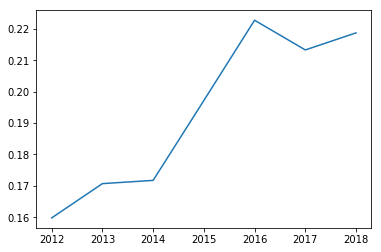

In [37]:
spread_team_points_rs = []
for year in range(2012, 2019):
    #looking just at the data from the year for the regular season (rs)
    yr = spec_time(df, year, 'po')
    
    #getting variance in points per minute
    yr_ppm_var = calc_ppm_var(yr)
     
    spread_team_points_rs.append(np.mean(yr_ppm_var))

spread_team_points_rs = pd.Series(spread_team_points_rs, index=range(2012,2019))
plot.plot(spread_team_points_rs)

Now, just looking at the change between 2012 and 2018:

2012    0.015129
2018    0.034344
dtype: float64


<BarContainer object of 2 artists>

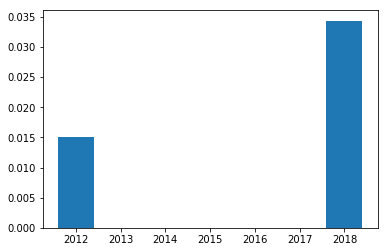

In [278]:
tw_vs_ei = [spread_team_points_rs[2012], spread_team_points_rs[2018]]
tw_vs_ei = pd.Series(tw_vs_ei, index=[2012, 2018])
print(tw_vs_ei)
plot.bar(height=tw_vs_ei, x=tw_vs_ei.index)

Below I generate a plot for the mean variance in points per minute across each team for the playoffs: 

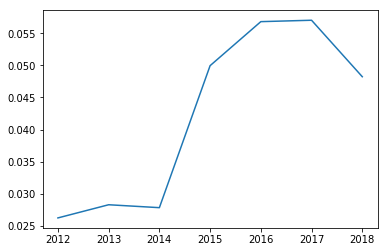

In [279]:
spread_team_points_po = []
for year in range(2012, 2019):
    #looking just at the data from the year for the regular season (rs)
    yr = spec_time(df, year, 'po')
    
    #getting variance in points per minute
    yr_ppm_var = calc_ppm_var(yr)
     
    spread_team_points_po.append(np.mean(yr_ppm_var))

spread_team_points_po = pd.Series(spread_team_points_po, index=range(2012,2019))
plot.plot(spread_team_points_po)

Just looking at 2012 compared to 2018 again:

2012    0.026232
2018    0.048238
dtype: float64


<BarContainer object of 2 artists>

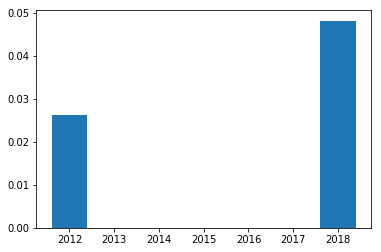

In [280]:
tw_vs_ei_po = [spread_team_points_po[2012], spread_team_points_po[2018]]
tw_vs_ei_po = pd.Series(tw_vs_ei_po, index=[2012, 2018])
print(tw_vs_ei_po)
plot.bar(height=tw_vs_ei_po, x=tw_vs_ei_po.index)

### Missingness:
---

It is evident that I ran out of time. Next project I will start sooner :)

In [292]:
def kstat(vals):
    #a boolean series for whether or not a player is in the playoffs
    not_pres = vals[vals.filter(like='po').columns[0]].isnull()
    pres = ~not_pres
    
    #of all players (which is why I look at the regular season), creating
    #two series of which teams they are on
    reg = vals.filter(like='rs').filter(like='MP')
    n_pres = reg[not_pres][reg.columns[0]]
    y_pres = reg[pres][reg.columns[0]]
    
    return ks_2samp(n_pres, y_pres)

### Hypothesis Test
---

In [281]:
def test_stat(df):
    ppm_var = calc_ppm_var(df)
    
    pt_piv = df.pivot_table(index='Tm', values='PTS', aggfunc=sum)
    tot_points = pt_piv['PTS']
    
    ks_2samp(ppm_var, tot_points)
    return ppm_var

In [284]:
def calc_p(df):
    cp = df.copy()
    prop_index = cp.index
    observed = test_stat(cp)
    total = 0
    numtest = 1000
    
    for i in range(numtest):
        shuffled_teams = cp['Tm'].sample(replace=False, frac=1).reset_index(drop=True)
        shuffled_teams.index = prop_index
        cp['Tm'] = shuffled_teams
        test = test_stat(cp)
        if (test[0] >= observed[0]):
            total += 1
        
    return total / numtest

In [285]:
test_on = spec_time(df, 2015, 'rs')
pval = calc_p(test_on)
pval

0.824